# <span style="color:black"> Numerical Simulation Laboratory (NSL) </span>

## Francesco Gnan - <span style="color:grey">  Numerical Exercises 9</span>
------------------------------------------------------------------------------------------------------------------------------

# <span style="color:red"> Introduction </span>

In this exercise we want to study **Genetic Algorithms (GA)**; in particular we will implement a code capable of solving the  **traveling salesman problem (TSP)**.

Below there is a list of the packages that will be used during this notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# <span style="color:red"> Genetic Algorithms </span>

GA use biological evolution as an inspiration for solving computational optimization problems. This strategy ensures:
- **Intensification**: the best candidate solutions are more likely to reproduce
- **Diversification**: a large population of possible and different solutions is studied and evolved

-------------------------------------------------------------------------------------------------------------------------------
The **population** is a set of **chromosomes**; each chromosome consists of **genes** and each gene is an instance of a 
particular **allele**. So, we construct a set (population) of strings (chromosomes) filled with numbers (genes).
With each generation we create a new population through:
   1) **Selection operator**, which imitates natural selection
   
   2) **Crossover**, that imitates biological recombination between two single-chromosome organisms
   
   3) **Mutations**, which randomly change the allele values of some locations in the chromosome
 
-------------------------------------------------------------------------------------------------------------------------------
#### <span style="color:red"> Selection operator </span>
It selects chromosomes in the population for reproduction. The fitter the chromosome, the more times it is likely to be selected to reproduce. It uses the order in the orderd population with  $M$  individuals, e.g. select the individual  $j$  with the algorithm:  

$$ j=int\left(M\times r^p\right) + 1$$
where  $𝑟$  is a uniform random number  $𝑟\in [0,1)$  and  $p$  a convenient exponent. If at each generation the population is sorted by putting the best candidates at the beginning of the list, the higher the value of $p$, the more likely the first chromosomes in that list will be selected. We choose $p=4$.

The goodness of a solution is quantified by a cost function $L(\vec{x})$. In our case, chromosomes that minimize $L(\vec{x})$ will be better.

-------------------------------------------------------------------------------------------------------------------------------
#### <span style="color:red"> Crossover </span>
Whenever we call this operation, it will be executed with $80\%$ probability.

    1) We randomly select a mother and a father, i.e. two rows of the population matrix
    2) We cut their paths at the same position conserving the first part of the paths
    3) We complete the paths with the missing cities adding them in the order in which they appear in the consort
    
-------------------------------------------------------------------------------------------------------------------------------
#### <span style="color:red"> Mutations </span>
Every mutation has a $10\%$ probability to be executed. Each time a mutation is called, we randomly select an element from the population and perform some modifications on it. For example, we can swap the positions of two cities (except for the first city).

# <span style="color:red"> The Traveling Salesman Problem </span>

Given a set of  $𝑁$ cities with positions  $\vec{c}_i$, the salesman has to visit each one of the cities starting from a certain one and returning to the same city. We want to find the trip that minimizes the total distance to travel, i.e. the path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

where, if $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$ is the ordered sequence of cities, $\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N$ is one particular permutation of the ordered sequence (with $\vec{x}_{N+1}=\vec{x}_1$). We express a possible path (chromosome) via a 1D vector whose elements (genes), from the first to the last, are integers (alleles) that represents the cities in the order in which the salesman would visit them.

# <span style="color:red"> The Code </span>

There are two main files to consider: <font face = "Courier"> `TSP.cpp` </font> and <font face = "Courier"> `GeneticAlgorithm.cpp` </font>. The first contains the <font face = "Courier"> `main()` </font> function, in which the simulation of population evolution is organized. In <font face = "Courier"> `main()` </font> a <font face = "Courier"> `std::vector<Posizione>` </font> is constructed. This vector saves the cities' positions.
We use this vector to declare an object <font face = "Courier"> `GA` </font>, which is implemented in the second file.
    
The <font face = "Courier"> `GA` </font> class creates a population matrix; each row of this matrix is a permutation of indexes. We associate each index with a city. So, with appropriate <font face = "Courier"> `GA` </font> methods, we perform all selection, crossover, mutation and sorting operations directly on the population matrix.

Having found the best permutation of indices, we derive the best sequence of cities.

# <span style="color:red"> Test on a circumference </span>

In order to test our code, we try to optimize a path among 34 cities randomly placed on a circumference. We evolve a population of 1000 chromosomes through 300 generations. Below there is a graph of the best path found by the algorithm at the last generation.

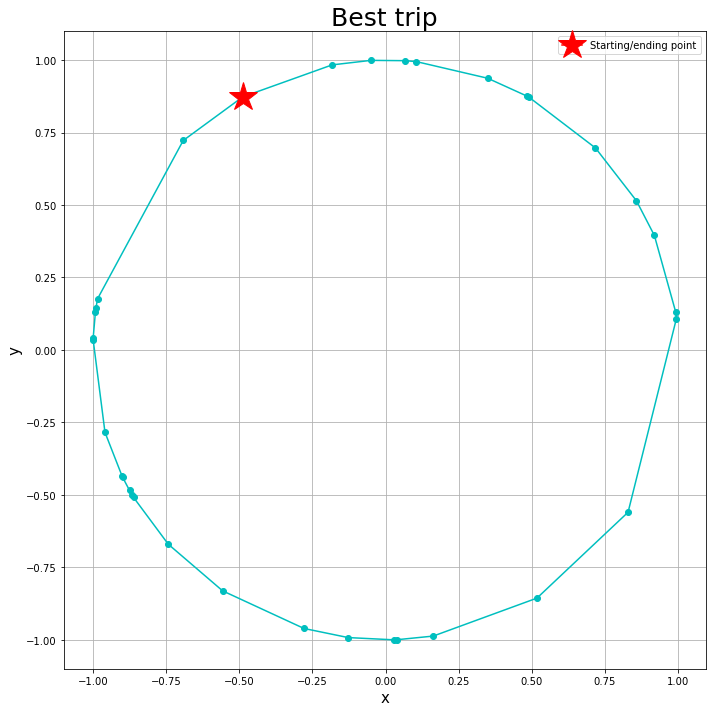

In [8]:
x, y = np.loadtxt("./Risultati//Circle/Circle.dat", usecols=(1,2), unpack='true')

plt.figure(figsize=(10,10))
plt.title('Best trip',fontsize=25)

plt.plot(x,y,color='c',marker='o')
plt.plot(x[0],y[0],color='red',marker='*',markersize=30,label='Starting/ending point')
plt.xlabel(r'x', fontsize=15) 
plt.ylabel('y', fontsize = 15)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

We now show a picture of $L^{(2)}$ of the best path and of $\langle L^{(2)}\rangle$, averaged on the best half of the population, as a function of the iterations/generations of your algorithm. We compare them with the exact value of the perimeter of a circle of unit radius.

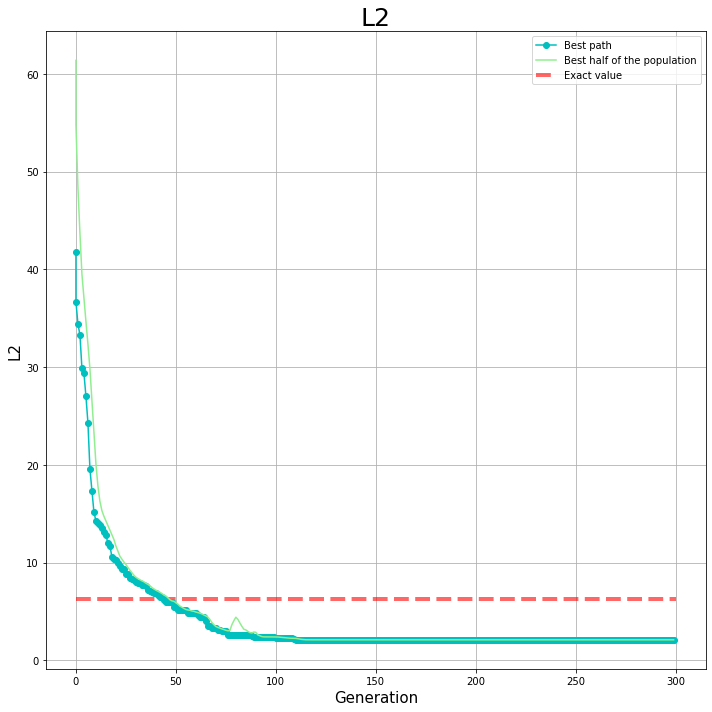

In [12]:
gen, L2 = np.loadtxt("./Risultati/Circle/L2.dat", usecols=(0,1), unpack='true')
genH, HL2 = np.loadtxt("./Risultati/Circle/BestH.dat", usecols=(0,1), unpack='true')

plt.figure(figsize=(10,10))
plt.title('L2',fontsize=25)
plt.plot(gen,L2,color='c',marker='o', label='Best path')
plt.plot(genH,HL2,color='lightgreen', label='Best half of the population')
plt.hlines(2*np.pi,0.0,300, color='red', linestyle='--', label="Exact value", linewidth=4, alpha=0.6)
plt.xlabel(r'Generation', fontsize=15) 
plt.ylabel('L2', fontsize = 15)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The algorithm does not find the expected value. Since the result is an underestimate, it could be because the number of cities is too small and they do not densely cover the perimeter of the circle. We try again with 200 cities and 1000 generations.

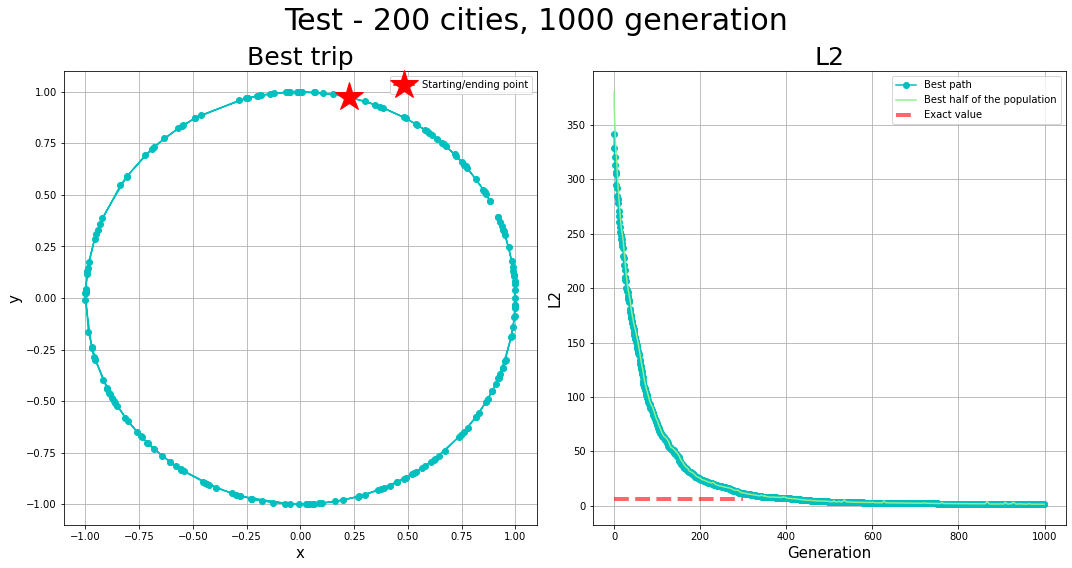

In [20]:
x, y = np.loadtxt("./Risultati/Circle/200Circle.dat", usecols=(1,2), unpack='true')
gen, L2 = np.loadtxt("./Risultati/Circle/200L2.dat", usecols=(0,1), unpack='true')
genH, HL2 = np.loadtxt("./Risultati/Circle/200BestH.dat", usecols=(0,1), unpack='true')

plt.figure(figsize=(15,8))
plt.suptitle('Test - 200 cities, 1000 generation',fontsize=30)

plt.subplot(1,2,1)
plt.title('Best trip',fontsize=25)
plt.plot(x,y,color='c',marker='o')
plt.plot(x[0],y[0],color='red',marker='*',markersize=30,label='Starting/ending point')
plt.xlabel(r'x', fontsize=15) 
plt.ylabel('y', fontsize = 15)
plt.grid(True)
plt.legend()
plt.subplot(1,2,2)
plt.title('L2',fontsize=25)
plt.plot(gen,L2,color='c',marker='o', label='Best path')
plt.plot(genH,HL2,color='lightgreen', label='Best half of the population')
plt.hlines(2*np.pi,0.0,300, color='red', linestyle='--', label="Exact value", linewidth=4, alpha=0.6)
plt.xlabel(r'Generation', fontsize=15) 
plt.ylabel('L2', fontsize = 15)
    
plt.grid(True)
plt.legend() 
plt.tight_layout()
plt.show()

We conclude that the code works and we can continue. Now we want to do the same with 34 cities randomly placed inside a square.

# <span style="color:red"> Square </span>

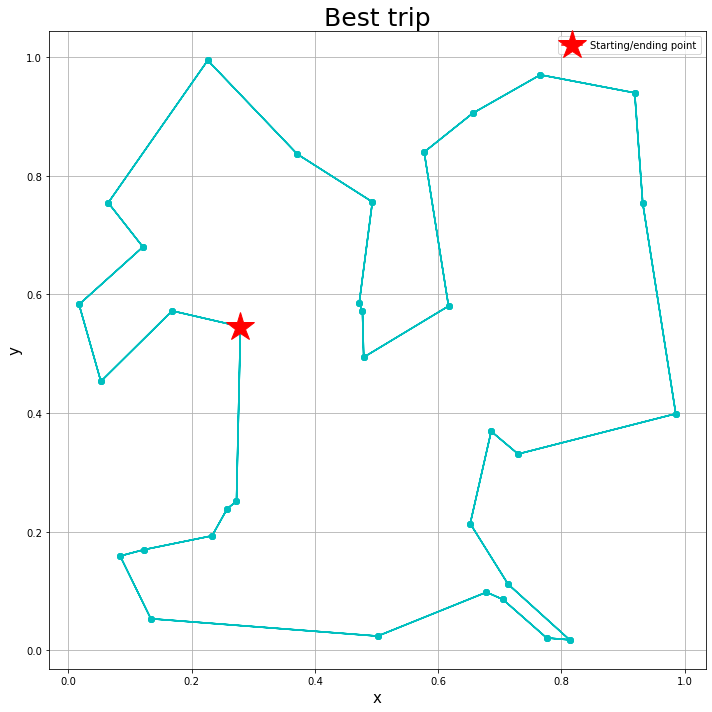

In [24]:
x, y = np.loadtxt("./Risultati/Square/Square.dat", usecols=(1,2), unpack='true')

plt.figure(figsize=(10,10))
plt.title('Best trip',fontsize=25)
plt.plot(x,y,color='c',marker='o')
plt.plot(x[0],y[0],color='red',marker='*',markersize=30,label='Starting/ending point')
plt.xlabel(r'x', fontsize=15) 
plt.ylabel('y', fontsize = 15)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

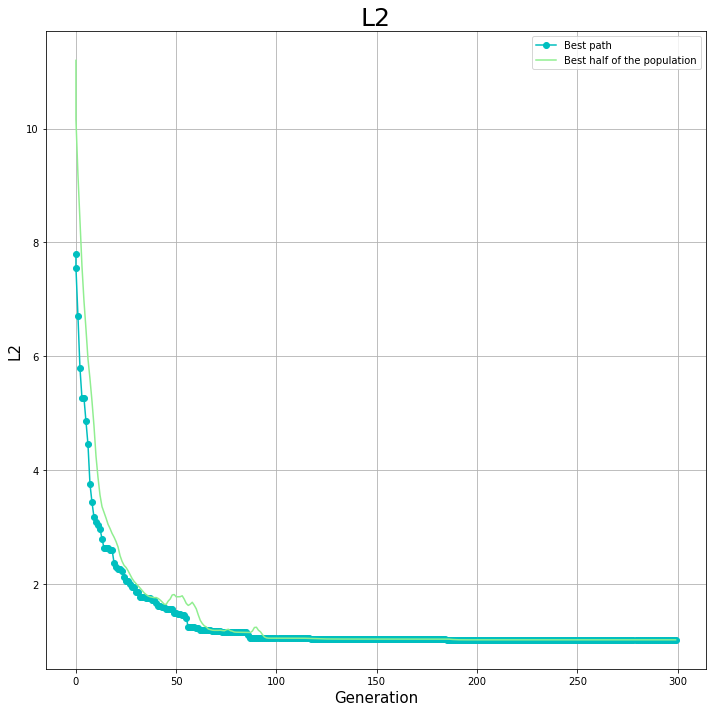

In [28]:
gen, L2 = np.loadtxt("./Risultati/Square/L2.dat", usecols=(0,1), unpack='true')
genH, HL2 = np.loadtxt("./Risultati/Square/BestH.dat", usecols=(0,1), unpack='true')

plt.figure(figsize=(10,10))
plt.title('L2',fontsize=25)

plt.plot(gen,L2,color='c',marker='o',label='Best path')
plt.plot(genH,HL2,color='lightgreen',label='Best half of the population')
plt.xlabel(r'Generation', fontsize=15) 
plt.ylabel('L2', fontsize = 15)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()